In [64]:
import pandas as pd
import seaborn as sns

In [65]:
p_df=sns.load_dataset("penguins")

In [66]:
p_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


### droping NAs and duplicates

In [67]:
p_df=p_df.dropna()

In [68]:
p_df=p_df.drop_duplicates()

### X-y split

In [69]:
X=p_df[["flipper_length_mm", "bill_depth_mm"]]
y=p_df[["body_mass_g"]]

### Train test split

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [72]:
y_test

,body_mass_g
30,3250.0
317,4875.0
79,4000.0
201,3675.0
63,4050.0
...,...
247,5650.0
122,3450.0
146,4250.0
182,3200.0


## NEED TO DO NORMALISATION (TRANSFORMATION POWER STANDARD ETC)

### Model training

In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
lm=LinearRegression()
model=lm.fit(X_train,y_train)

In [75]:
model.coef_

array([[52.20343571, 13.10815533]])

In [76]:
model.intercept_

array([-6509.21617362])

### Predict mass of random penguin

In [77]:
random_penguin=X_test.sample()

In [78]:
model.predict(random_penguin)

array([[3172.93085422]])

### Create predictuons for test set

In [79]:
y_pred=model.predict(X_test)

In [80]:
y_pred=pd.DataFrame(y_pred)

In [81]:
y_test=y_test.reset_index(drop=True)

In [82]:
residuals_df=pd.concat([y_test, y_pred], axis=1)
residuals_df

,body_mass_g,0
0,3250.0,3001.901576
1,4875.0,5271.325621
2,4000.0,3920.819556
3,3675.0,4053.835184
4,4050.0,3752.411909
...,...,...
79,5650.0,4911.144833
80,3450.0,2901.427151
81,4250.0,3653.248300
82,3200.0,3470.421682


In [83]:
residuals_df=residuals_df.rename(columns={"body_mass_g":"y_test", 0:"y_pred"})

In [84]:
residuals_df["residual"]=residuals_df["y_test"]-residuals_df["y_pred"]

In [85]:
residuals_df.head()

,y_test,y_pred,residual
0,3250.0,3001.901576,248.098424
1,4875.0,5271.325621,-396.325621
2,4000.0,3920.819556,79.180444
3,3675.0,4053.835184,-378.835184
4,4050.0,3752.411909,297.588091


### Metrics calculating

In [86]:
mean_error=residuals_df["residual"].mean()

In [87]:
mean_error

0.4256712769183001

In [49]:
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae

In [50]:
mse(y_test, y_pred)

135012.91730727017

In [51]:
mae(y_test, y_pred)

295.239293718512

In [53]:
import numpy as np
np.sqrt(mse(y_test, y_pred))

367.44103922571054

In [88]:
y_pred.mean()

0    4184.990995
dtype: float64

In [89]:
np.sqrt(mse(y_test, y_pred))/y_test.mean()*100

body_mass_g    8.779079
dtype: float64

In [90]:
rmse=mse(y_test, y_pred, squared=False)

In [91]:
rmse

367.44103922571054

In [92]:
from sklearn.metrics import r2_score

## COMPUTING R2

In [93]:
r2_score(y_test, y_pred)

0.7769325702390443

## Computing R2_score for train_set

In [96]:
y_train_predict=pd.DataFrame(model.predict(X_train))

In [98]:
r2_score(y_train, y_train_predict)

0.758862411002642

In [100]:
feature_names=list(X_train.columns)

In [99]:
coefficients=list(model.coef_)

In [105]:
coefficients=[i for i in coefficients[0]]

In [106]:
fi_dict={"name":feature_names, "coeff": coefficients}
fi_df=pd.DataFrame(fi_dict)
fi_df

,name,coeff
0,flipper_length_mm,52.203436
1,bill_depth_mm,13.108155


<Axes: xlabel='name', ylabel='coeff'>

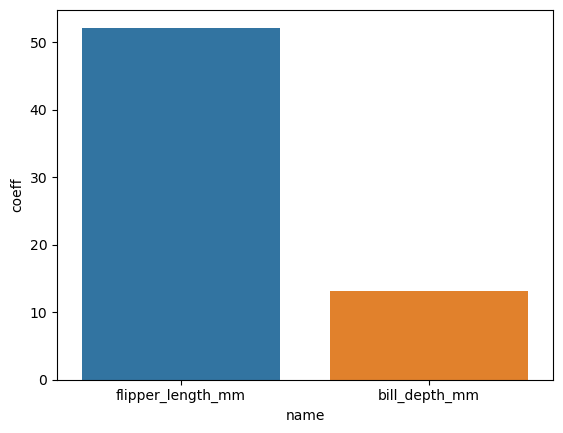

In [108]:
sns.barplot(x=fi_df["name"], y=fi_df["coeff"])

In [109]:
X_train["flipper_length_mm"].describe()

count    249.000000
mean     201.112450
std       13.866421
min      172.000000
25%      190.000000
50%      197.000000
75%      213.000000
max      231.000000
Name: flipper_length_mm, dtype: float64

## Encoding categorical variables

In [110]:
pd.read_csv("marketing_customer_analysis.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'marketing_customer_analysis.csv'